In [1]:
from qutip import *
import numpy as np
import math
z0=basis(2,0)
z1=basis(2,1)
Mz0=z0*z0.dag()
Mz1=z1*z1.dag()
H=snot()
Mx0=H*Mz0*H
Mx1=H*Mz1*H
x0=(z0+z1)/math.sqrt(2)
x1=(z0-z1)/math.sqrt(2)

C:\Users\z5015456\AppData\Local\Temp\ipykernel_29864\3655952975.py:8: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  H=snot()


In [2]:
# Probability of X-measurement result of + given state |+>.
s1=Mx0*x0
s1.dag()*s1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [3]:
# Probability of X-measurement result of - given state |+>.
s2=Mx1*x0
s2.dag()*s2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [4]:
# Probability of X-measurement result of + given state |->.
s3=Mx0*x1
s3.dag()*s3

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [5]:
# Probability of X-measurement result of - given state |->.
s4=Mx1*x1
s4.dag()*s4

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [6]:
# Probability of X-measurement result of + given state |0>.
s5=Mx0*z0
s5.dag()*s5

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

In [7]:
# Probability of X-measurement result of - given state |0>.
s6=Mx1*z0
s6.dag()*s6

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

In [8]:
# Probability of X-measurement result of + given state |1>.
s7=Mx0*z1
s7.dag()*s7

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

In [9]:
# Probability of X-measurement result of - given state |1>.
s8=Mx1*z1
s8.dag()*s8

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

In [10]:
import cmath
psi=0.6*z0+0.8*z1;
# State after Z-measurement result of 0.
st1=Mz0*psi
st1=st1/cmath.sqrt(((st1.dag()*st1).full())[0,0])
# State after X-measurement result of +.
st2=Mx0*st1
st2=st2/cmath.sqrt(((st2.dag()*st2).full())[0,0])

In [11]:
# Probability for final Z-measurement result of 0.
r0=Mz0*st2
r0.dag()*r0

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

In [12]:
# Probability for final Z-measurement result of 1.
r1=Mz1*st2
r1.dag()*r1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5]]

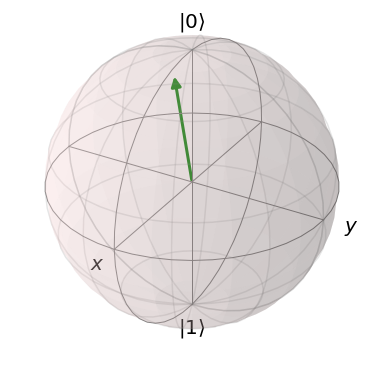

In [13]:
# State with decoherence by factor of p on off-diagonals.
theta=0.4
p=0.6
sn=np.sin(theta/2)
cs=np.cos(theta/2)
r0=cs**2*z0*z0.dag() + sn**2*z1*z1.dag() + cs*sn*(z0*z1.dag()+z1*z0.dag())*p
# Define a function for returning the Bloch vector.
def blvec(rho):
    ss1=sigmax()*rho
    ss2=sigmay()*rho
    ss3=sigmaz()*rho
    s1=ss1.tr().real
    s2=ss2.tr().real
    s3=ss3.tr().real
    return [s1,s2,s3]
b=Bloch()
b.add_vectors(blvec(r0))
b.show()

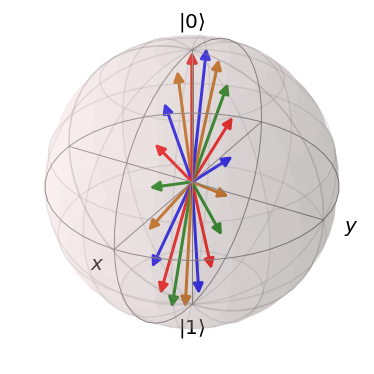

In [14]:
# Show for a range of rotation angles.
b=Bloch()
num=20
p=0.6
thetas=np.linspace(0,2*np.pi,num)
for theta in thetas:
    sn=np.sin(theta/2)
    cs=np.cos(theta/2)
    r1=cs**2*z0*z0.dag() + sn**2*z1*z1.dag() + cs*sn*(z0*z1.dag()+z1*z0.dag())*p
    b.add_vectors(blvec(r1))
b.show()

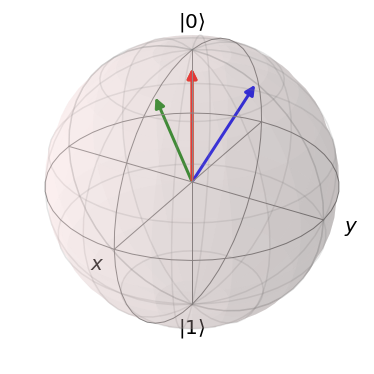

In [15]:
# Now describe decoherence due to measurement in the z-direction.
# It gives one vector in the xz-plane, and an other in the yz-plane,
# and shows that both of them are collapsed onto the z-axis.
theta=0.5
p=0.6
psi=np.cos(theta/2)*z0 + np.sin(theta/2)*z1
r0=psi*psi.dag()
b=Bloch()
b.add_vectors(blvec(r0))
r1=Mz0*r0*Mz0+Mz1*r0*Mz1
b.add_vectors(blvec(r1))
psi=np.cos(theta/2)*z0 + 1j*np.sin(theta/2)*z1
r0=psi*psi.dag()
b.add_vectors(blvec(r0))
r1=Mz0*r0*Mz0+Mz1*r0*Mz1
b.add_vectors(blvec(r1))
b.show()

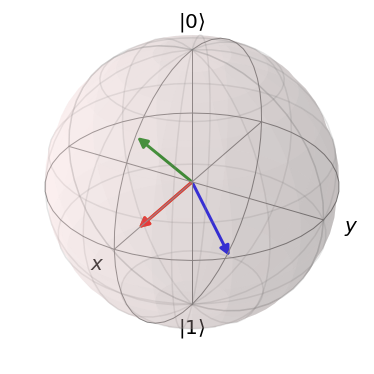

In [16]:
# Now describe decoherence due to measurement in the x-direction.
# It gives one vector in the xz-plane, and an other in the xy-plane,
# and shows that both of them are collapsed onto the x-axis.
theta=0.8
p=0.6
psi=np.cos(theta/2)*z0 + np.sin(theta/2)*z1
r0=psi*psi.dag()
b=Bloch()
b.add_vectors(blvec(r0))
r1=Mx0*r0*Mx0+Mx1*r0*Mx1
b.add_vectors(blvec(r1))
psi=(z0 +np.exp(1j*(np.pi/2-theta))*z1)/np.sqrt(2)
r0=psi*psi.dag()
b.add_vectors(blvec(r0))
r1=Mx0*r0*Mx0+Mx1*r0*Mx1
b.add_vectors(blvec(r1))
b.show()